In [206]:
# импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

%matplotlib inline
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
housing = fetch_california_housing()


# 7 Работа с переменными

In [207]:
# print(fetch_california_housing().DESCR)

## Анализ массива

### загрузка данных

In [208]:
target = pd.DataFrame(pd.Series(housing.target), columns=housing.target_names)
features = pd.DataFrame(housing.data, columns=housing.feature_names)
features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [209]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


### проверка наличия пропусков в массиве

In [210]:
for col in features.columns:
    if features[col].isnull().sum():
        raise print(f"из None column {col}", features[col].isnull().sum())

## Линейная регрессия

In [211]:
class LinearRegressionAnalyzer:
    
    def __init__(self):
        self.results = {}  # Список для хранения результатов каждой манипуляции
        self.reg = LinearRegression()

    def train_and_plot_linear_regression_with_hist_and_corr(self, count, X, y, manipulate_info):
        self.train_and_plot_linear_regression(count, X, y, manipulate_info)
        # Создаем сетку из двух графиков рядом
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        # Выводим гистограмму целевой переменной на первом графике
        axes[0].hist(self.y, bins=30, color='blue', alpha=0.7)
        axes[0].set_xlabel('Значения целевой переменной')
        axes[0].set_ylabel('Частота')
        axes[0].set_title(f'{self._manipulate_info}\nРаспределение целевой переменной')
        
        # Выводим корреляционную матрицу на втором графике
        correlation_matrix = self.X.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[1])
        axes[1].set_title('Корреляционная матрица')
        
        plt.tight_layout()  # Для избежания наложения графиков
        plt.show()

    def train_and_plot_linear_regression(self, count, X, y, manipulate_info):
        self.X, self.y = X, y
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        self.reg.fit(X_train, y_train)
        y_pred = self.reg.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        self._manipulate_info = manipulate_info
        # Создаем словарь с результатами текущей манипуляции
        result = {
            "Модель": "Линейная Регрессия",
            "RMSE": round(rmse, 3),
            "R2": round(r2, 3),
            "Признаки и преобразования": self._manipulate_info,
        }
        
        self.results.update({count: result})  # Добавляем результат в список



    def get_results(self):
        return self.results

analyze_reg = LinearRegressionAnalyzer()


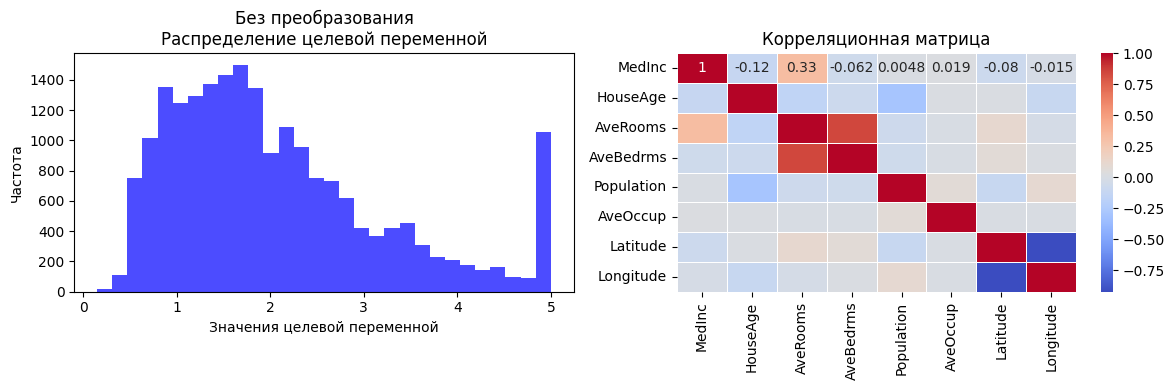

,R2,RMSE,Модель,Признаки и преобразования
1,0.576,0.746,Линейная Регрессия,Без преобразования


In [212]:
analyze_reg.train_and_plot_linear_regression_with_hist_and_corr(1, features, target, "Без преобразования")
pd.DataFrame(analyze_reg.get_results()).T

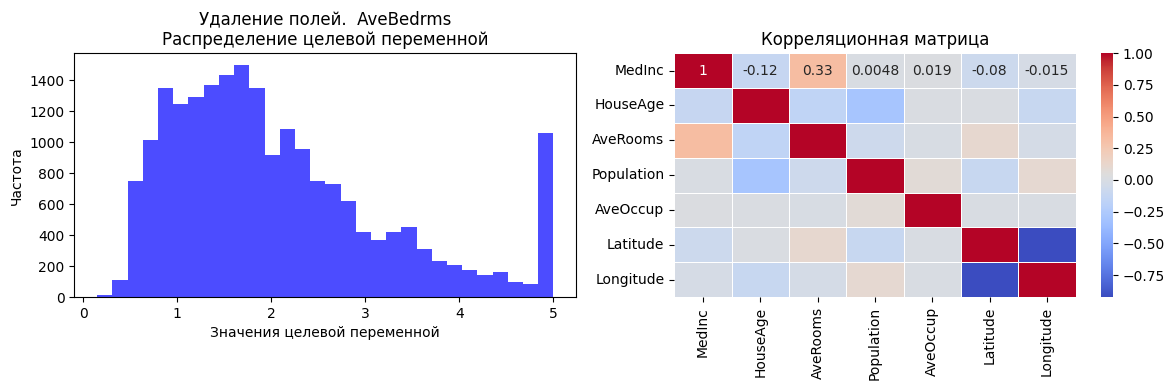

,Модель,RMSE,R2,Признаки и преобразования
1,Линейная Регрессия,0.746,0.576,Без преобразования
2,Линейная Регрессия,0.74,0.582,Удаление полей. AveBedrms


In [213]:
analyze_reg.train_and_plot_linear_regression_with_hist_and_corr(2, features.drop('AveBedrms', axis=1), target, "Удаление полей.  AveBedrms")
pd.DataFrame(analyze_reg.get_results()).T

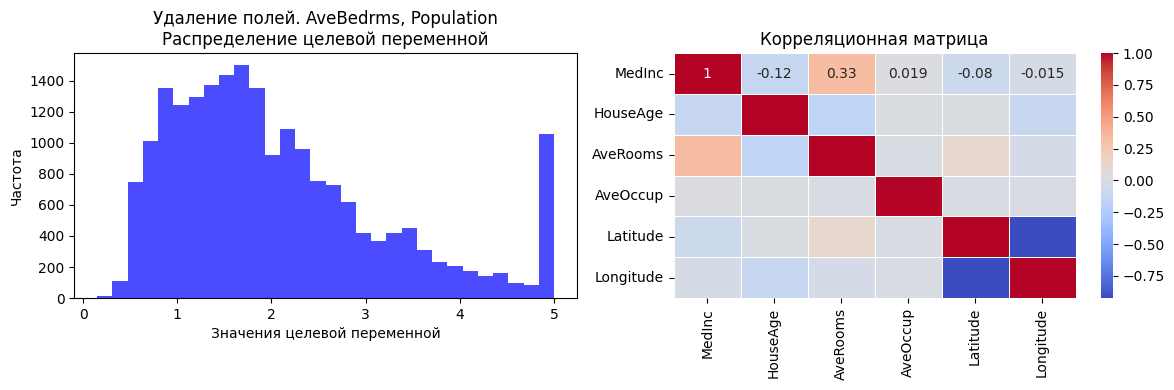

,Модель,RMSE,R2,Признаки и преобразования
1,Линейная Регрессия,0.746,0.576,Без преобразования
2,Линейная Регрессия,0.74,0.582,Удаление полей. AveBedrms
3,Линейная Регрессия,0.74,0.582,"Удаление полей. AveBedrms, Population"


In [214]:
analyze_reg.train_and_plot_linear_regression_with_hist_and_corr(3, features.drop(['AveBedrms', 'Population'], axis=1), target, "Удаление полей. AveBedrms, Population")
pd.DataFrame(analyze_reg.get_results()).T

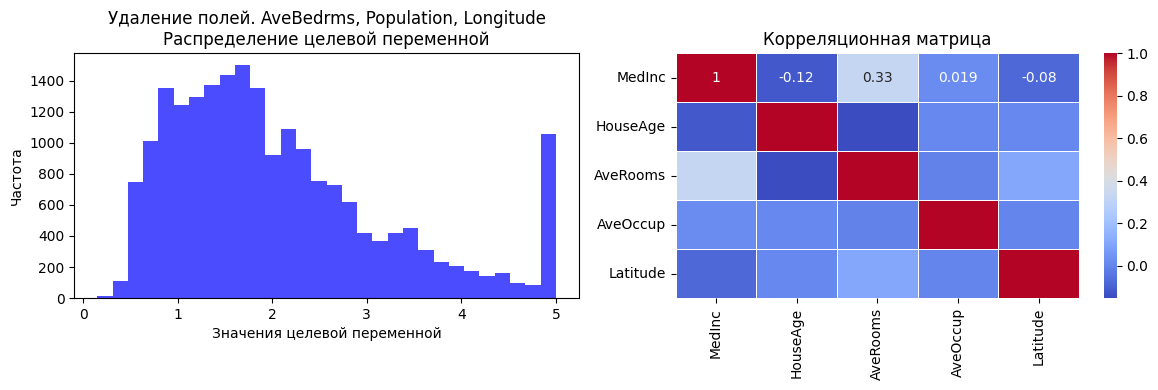

,Модель,RMSE,R2,Признаки и преобразования
1,Линейная Регрессия,0.746,0.576,Без преобразования
2,Линейная Регрессия,0.74,0.582,Удаление полей. AveBedrms
3,Линейная Регрессия,0.74,0.582,"Удаление полей. AveBedrms, Population"
4,Линейная Регрессия,0.805,0.506,"Удаление полей. AveBedrms, Population, Longitude"


In [215]:
analyze_reg.train_and_plot_linear_regression_with_hist_and_corr(4, features.drop(['AveBedrms', 'Population', 'Longitude'], axis=1), target, "Удаление полей. AveBedrms, Population, Longitude")
pd.DataFrame(analyze_reg.get_results()).T

In [216]:

# Если ваша целевая переменная имеет выбросы справа, то есть значения, которые сильно отличаются от основной массы данных и могут искажать результаты модели, можно рассмотреть следующие варианты действий:

# Удалить выбросы: Вы можете удалить наблюдения, которые являются выбросами, если вы уверены, что они не являются репрезентативными для вашей задачи. Однако это может привести к потере данных.

# Преобразовать переменную: Вы можете применить математические преобразования к целевой переменной, чтобы сделать распределение более нормальным. Например, логарифмическое преобразование (логарифмирование) может помочь уменьшить влияние выбросов.

# Использовать устойчивые модели: Некоторые алгоритмы машинного обучения более устойчивы к выбросам, чем другие. Например, Random Forest и Gradient Boosting обычно более устойчивы к выбросам, чем линейная регрессия.

# Использовать регуляризацию: Если вы используете линейную регрессию, то можно применить регуляризацию (например, L1 или L2), чтобы уменьшить влияние выбросов на модель.

# Использовать другие методы обработки выбросов: Существуют методы обработки выбросов, такие как замена выбросов на медиану или среднее значение, интерквартильный диапазон (IQR) и другие.

# Выбор конкретного метода зависит от вашей задачи, данных и предположений. Важно также оценить влияние выбросов на результаты модели и принять решение на основе этой оценки.